In [1]:
import sys
import os

# Add project root to path
sys.path.append(os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.validation.validation import *
from src.eda.eda_metrics import *
from src.config.config import *
from src.utils.visualization import *
plt.style.use("seaborn-v0_8")


In [2]:
df = pd.read_csv(
    "../data/processed/indian_machinery_transaction_data_3.csv",
    parse_dates=["invoice_date"]
)

df.head()


,invoice_id,invoice_date,year,month,season,customer_type,brand,product_name,product_category,specification,quantity,mrp,selling_price,unit_cost,discount_pct,revenue,profit
0,500001,2019-01-01,2019,1,Winter,Retail,Supreme,PVC Pipe,Pipe,0.5 inch,1,89.61,83.49,70.69,6.83,83.49,12.80
1,500061,2019-01-01,2019,1,Winter,Retail,Jain,Sprinkler Set,Irrigation,Heavy Duty,2,2257.78,2224.77,1902.32,1.46,4449.54,644.90
2,500060,2019-01-01,2019,1,Winter,Contractor,Jain,Sprinkler Set,Irrigation,Mini,2,1446.31,1334.39,1222.70,7.74,2668.78,223.38
3,500059,2019-01-01,2019,1,Winter,Farmer,Jain,Sprinkler Set,Irrigation,Mini,1,1446.31,1195.99,1021.78,17.31,1195.99,174.21
4,500058,2019-01-01,2019,1,Winter,Retail,Jain,Sprinkler Set,Irrigation,Mini,3,1446.31,1423.58,1200.86,1.57,4270.74,668.16


### Yearly transactions

In [3]:
# yearly_transactions(df)

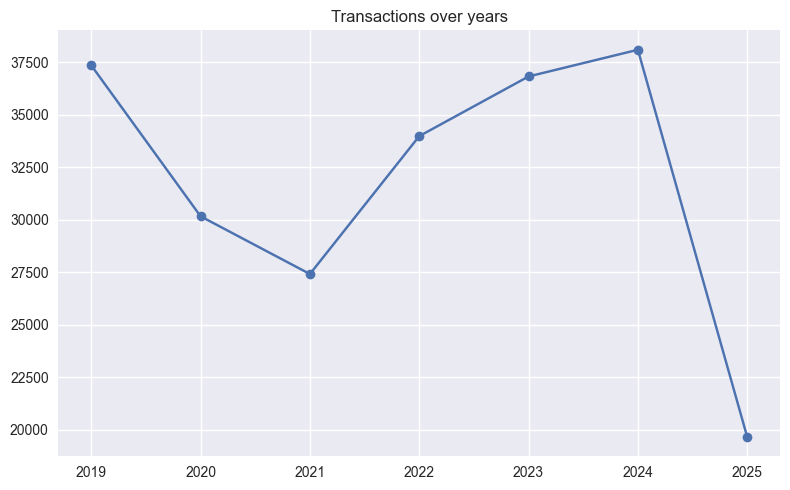

In [4]:
plot_line_chart(yearly_transactions(df),title="Transactions over years")

### Transaction dip during COVID-19

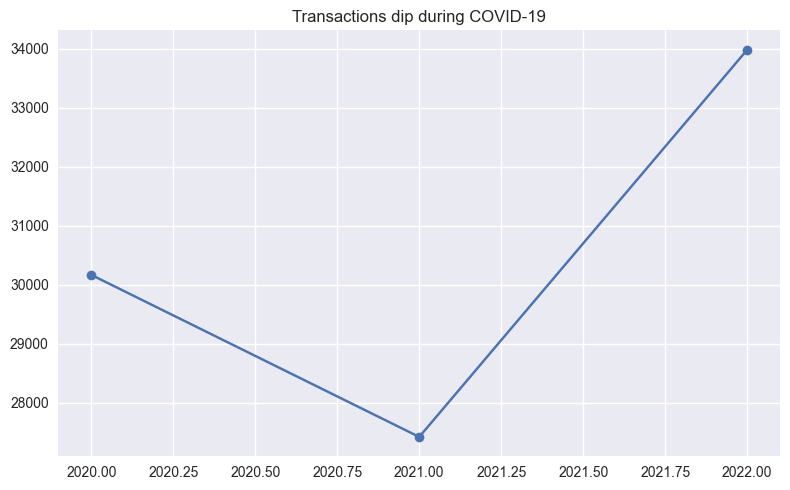

In [5]:
covid_txn = covid_period_impact(df)
plot_line_chart(covid_txn,title="Transactions dip during COVID-19")


### Drought impact on revenue


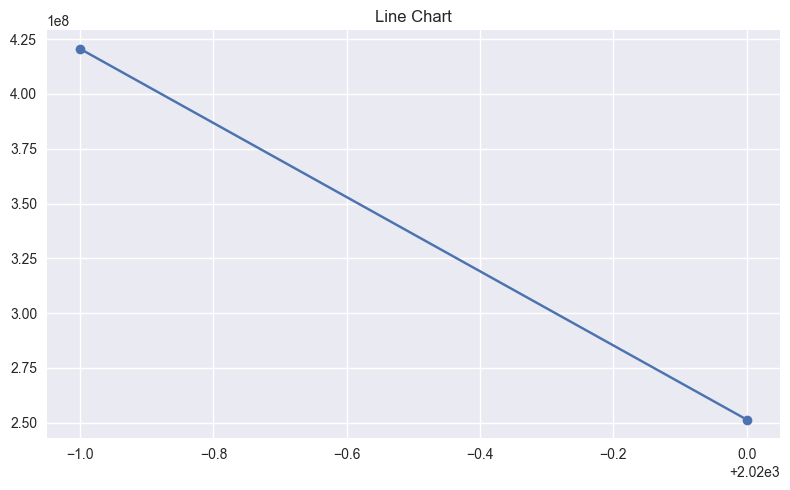

In [7]:
drought_revenue = drought_year_impact(df, DROUGHT_YEARS)
plot_line_chart(drought_revenue,"Total Revenue")


### Monthly seasonality

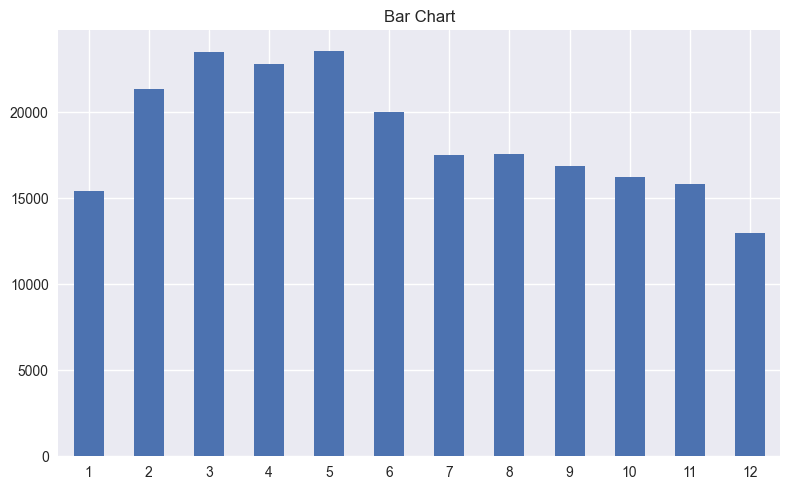

In [9]:
monthly_txn = monthly_transactions(df)
plot_bar_chart(monthly_txn,"Transactions")


In [10]:
peak_txn = monthly_txn.loc[PEAK_SEASON_MONTHS]
peak_txn


month
5    23570
6    19997
7    17485
8    17553
dtype: int64

### Revenue by season

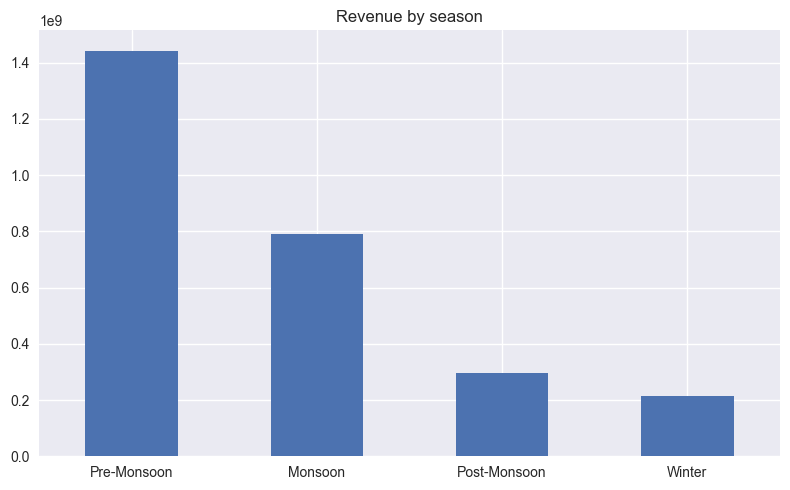

In [12]:
plot_bar_chart(revenue_by_season(df),title="Revenue by season")
